# Diluted Unitary Probability Fitting

In [48]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import ProbabilityMSE, ProbabilityRValue
from optimization import ModelQuantumMap, Logger
from quantum_channel import channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Four Qubits, Repetition

In [49]:
n = 4
d = 2**n

path1 = "../../../data/"
path2 = "data/"

[model1, model2, model3, model4, model5] = loader(path1 + "belem_4qubit_repeated.model")

spectrum1 = channel_spectrum(model1.channel, keep_unity=False)
spectrum2 = channel_spectrum(model2.channel, keep_unity=False) 
spectrum3 = channel_spectrum(model3.channel, keep_unity=False)
spectrum4 = channel_spectrum(model4.channel, keep_unity=False)

inputs, targets, _, _ = loader(path1 + "belem_4qubits_8layers_fixTopology0")

In [50]:
np.random.seed(42)

circuit_target = pqc_basic(n, 8)

#U = circuit_to_matrix(circuit_target)
U = generate_unitary(d)
np.random.seed(42)
tf.random.set_seed(42)

diluted_unitary = DilutedKrausMap(U = U, 
                                  c = 1 - 0.5659543898032584,
                                  kraus_part = KrausMap(d = d,
                                                        rank = 10,
                                                        trainable = False),
                                  spam = model1.channel.spam)

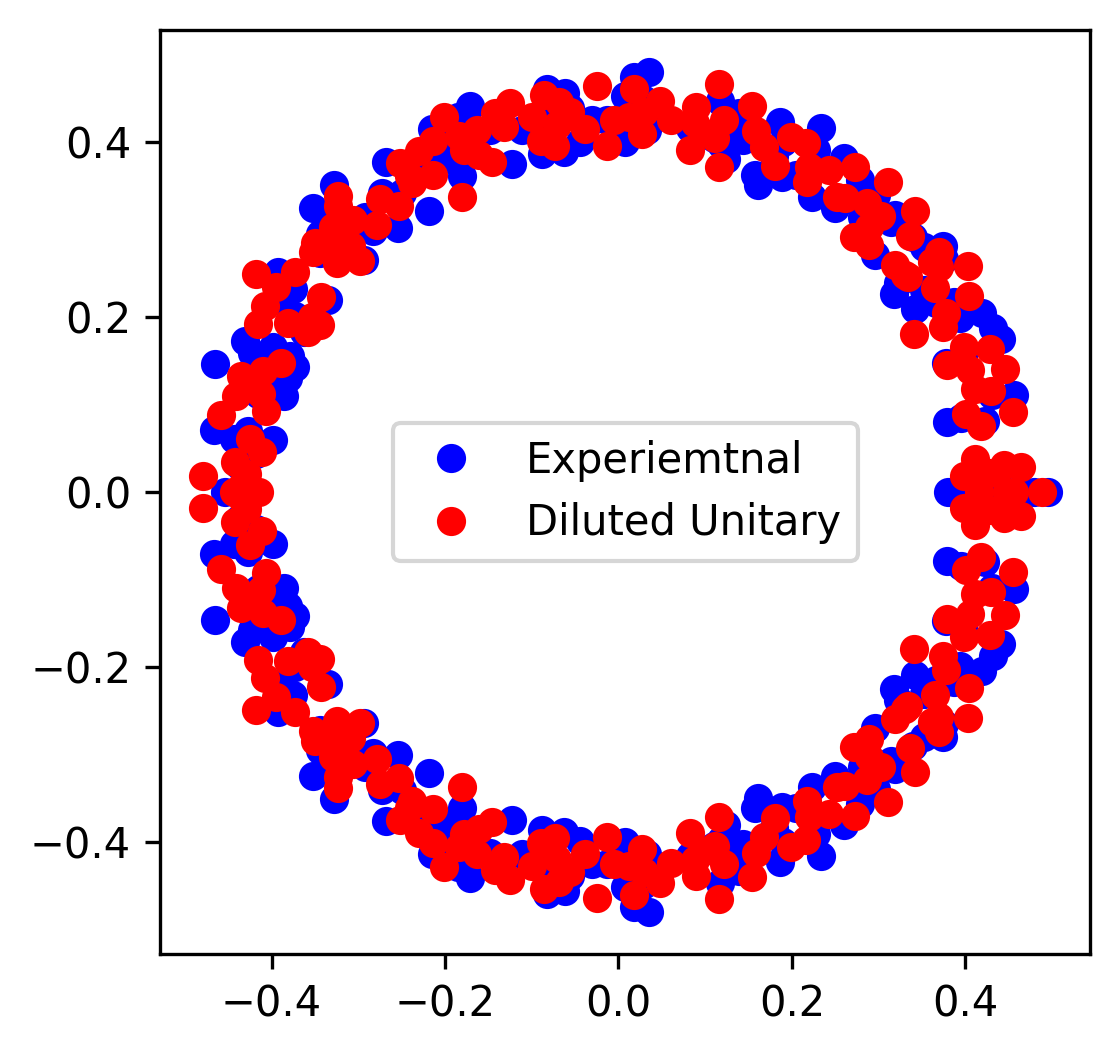

In [51]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()

In [ ]:
channel_fidelity(model1.channel, model.channel)

In [52]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 100, 
            N = 500, 
            verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

0.3709283181441441 -0.686405184665821
0.3031941585753467 -0.36865567688986034


In [ ]:
channel_fidelity(model1.channel, model.channel)

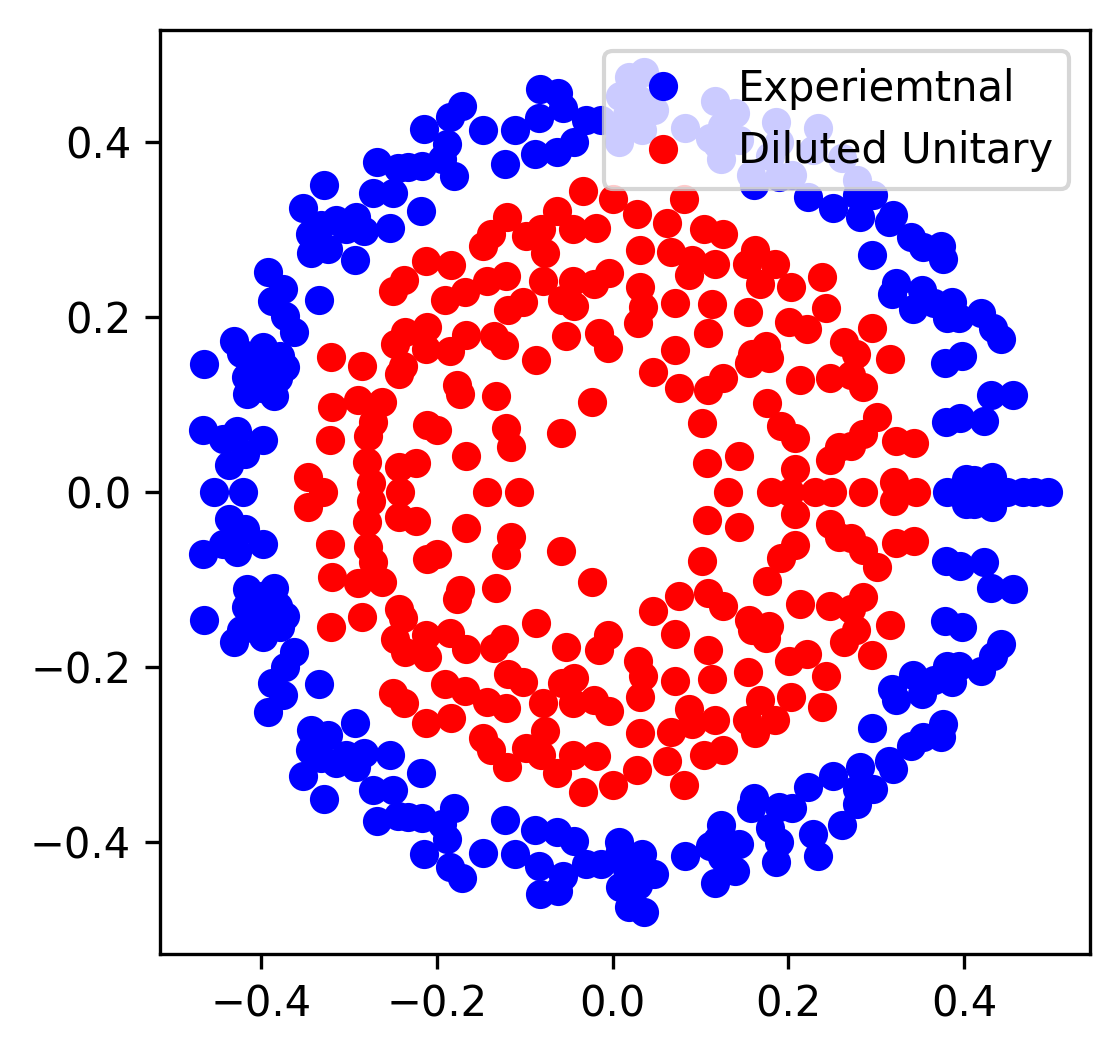

In [53]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()


In [ ]:
np.random.seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
np.random.seed(42)
tf.random.set_seed(42)

diluted_unitary = DilutedKrausMap(U = U, 
                                  c = 1 - 0.5659543898032584,
                                  kraus_part = KrausMap(d = d,
                                                        rank = 10,
                                                        trainable = False),
                                  spam = model1.channel.spam)

In [ ]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()

In [ ]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 1000, 
            N = 500, 
            verbose = True)

In [ ]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()

channel_fidelity(model1.channel, model.channel)

## Ensamble Fitting

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import ProbabilityMSE, ProbabilityRValue, EnsambleProbabilityMSE
from optimization import ModelQuantumMap, Logger
from quantum_channel import channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap, EnsambleDilutedUnitary
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
n = 4
d = 2**n

path1 = "../../../data/"
path2 = "data/"

[model1, model2, model3, model4, model5] = loader(path1 + "belem_4qubit_repeated.model")

spectrum1 = channel_spectrum(model1.channel, keep_unity=False)
spectrum2 = channel_spectrum(model2.channel, keep_unity=False) 
spectrum3 = channel_spectrum(model3.channel, keep_unity=False)
spectrum4 = channel_spectrum(model4.channel, keep_unity=False)

inputs, targets, _, _ = loader(path1 + "belem_4qubits_8layers_fixTopology0")

In [3]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  samples = 1,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))

c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


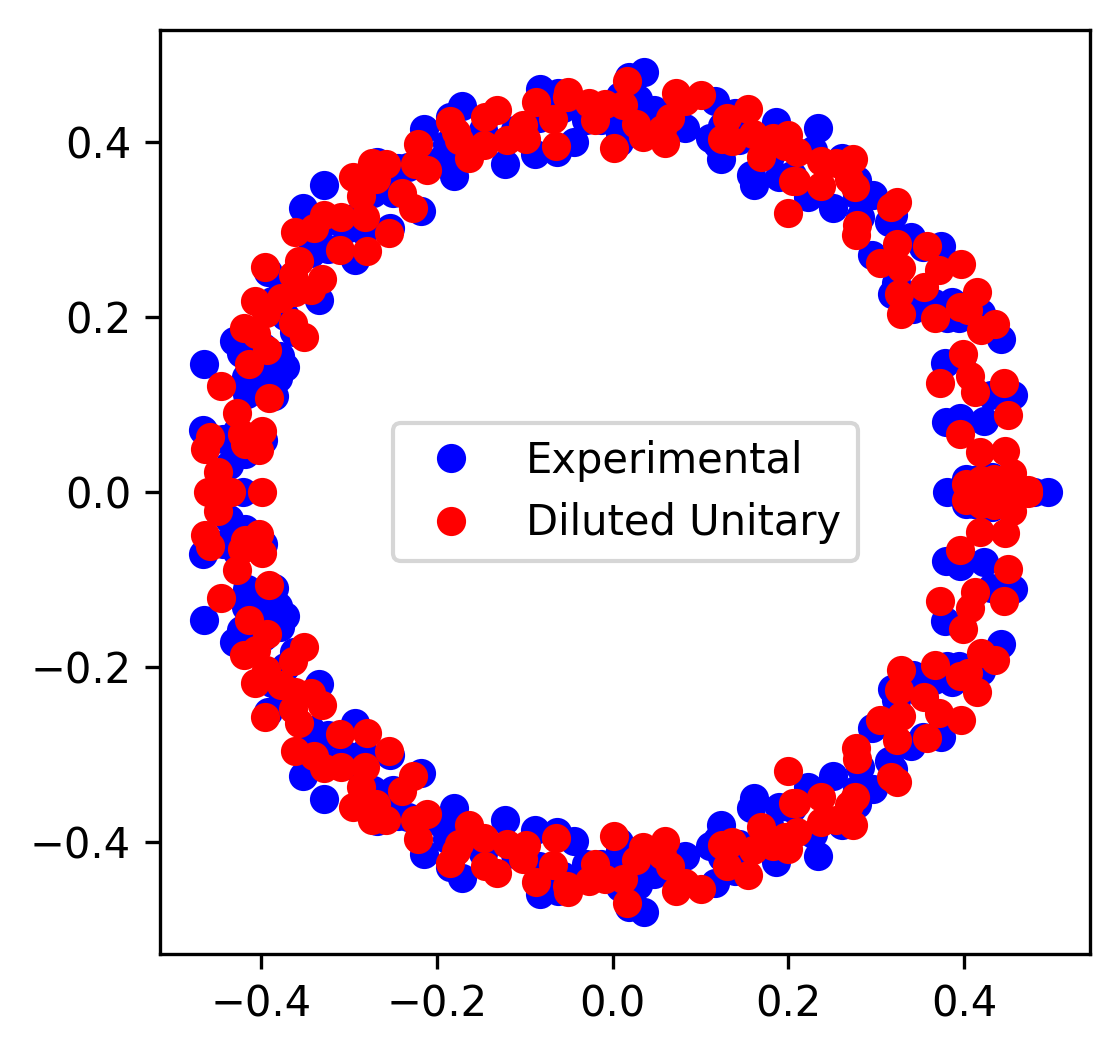

<tf.Tensor: shape=(), dtype=float64, numpy=0.02576461760037278>

In [4]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

channel_fidelity(model1.channel, model.channel.ensamble[0])

In [5]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 100, 
            N = 500, 
            verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

0.36987296493702193 None
0.3613158243893221 None
0.35828263014509526 None
0.3517421376225164 None
0.3299881482521951 None
0.33377006296800654 None
0.3247612531577269 None
0.3235812866556813 None
0.3273321161138592 None
0.30675585298826935 None
0.3128628808883496 None


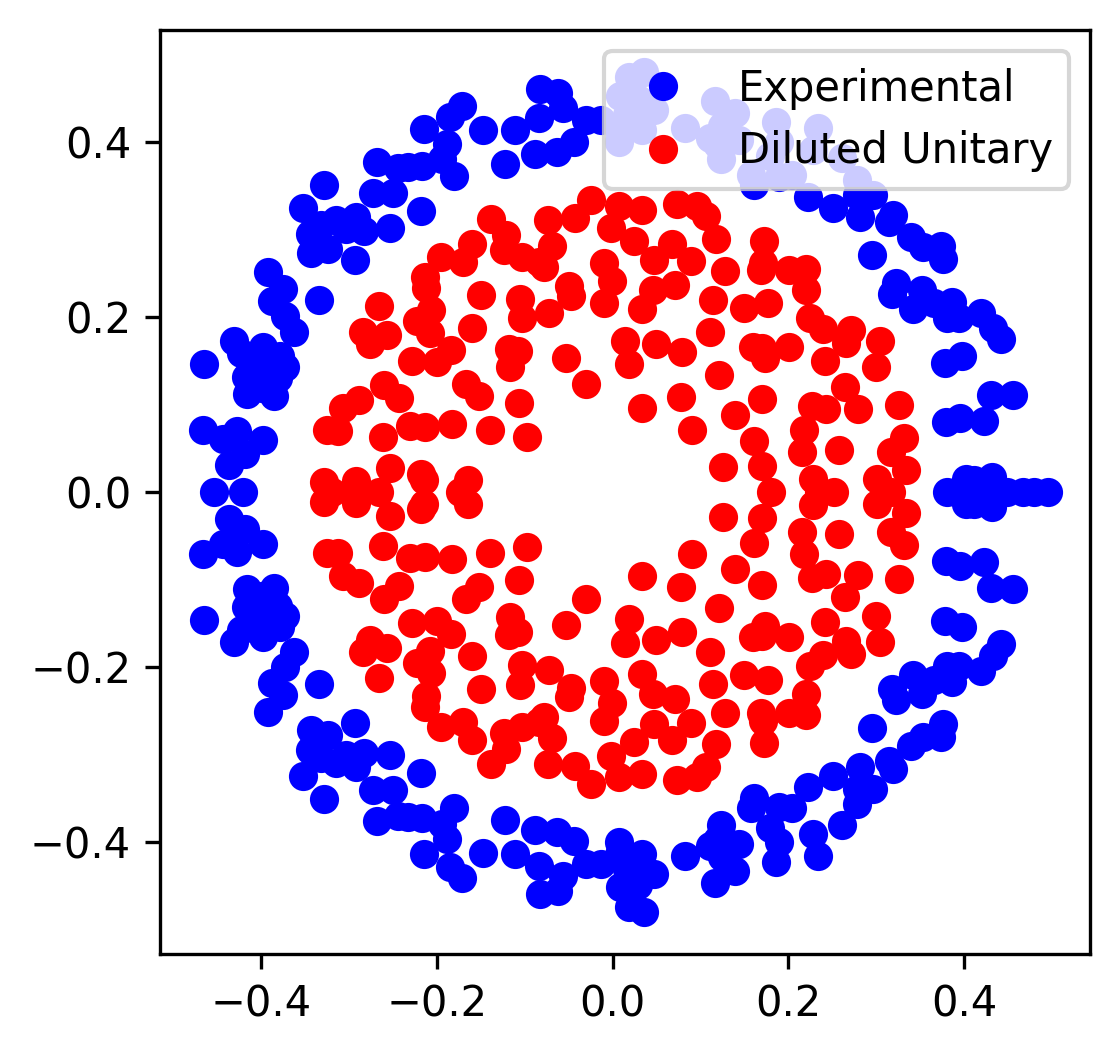

tf.Tensor(0.2518504518173999, shape=(), dtype=float64)


In [11]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [18]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  samples = 5,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))

In [19]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 100, 
            N = 500, 
            verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

0.26321676796338994 None
0.2623692552707505 None
0.2512576141152049 None
0.2463397993875102 None
0.24981812542459325 None
0.24940067663888063 None
0.24522461276650392 None
0.24957499909662823 None
0.24320511064689337 None
0.23616940339063305 None
0.23994777806017004 None


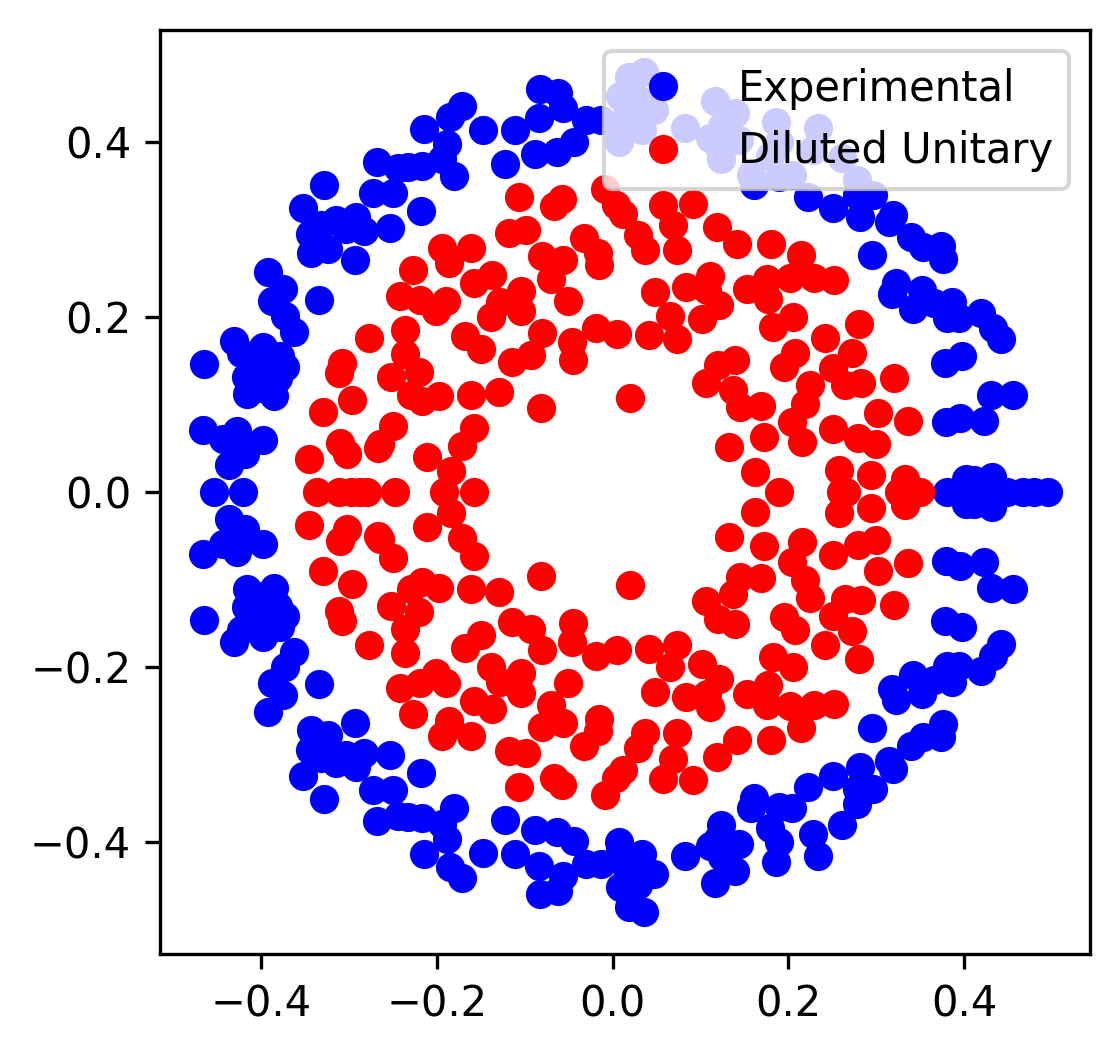

tf.Tensor(
[[[[-0.0535-0.0258j  0.183 -0.1326j  0.2645-0.1533j  0.3013+0.1413j
     0.3005-0.1753j -0.1569+0.161j   0.0322+0.1023j -0.0116+0.0926j
     0.1646-0.0661j -0.1895+0.411j   0.1389+0.1319j  0.3144-0.1126j
    -0.1776-0.0747j -0.096 +0.0458j -0.1087+0.1962j -0.0967-0.2384j]
   [-0.0886-0.2181j  0.2322-0.1847j -0.3577+0.0878j -0.0155+0.2879j
    -0.1132+0.1806j -0.0642-0.22j    0.2603+0.0358j  0.0294-0.0295j
     0.1721+0.3283j  0.175 +0.2545j  0.1064+0.037j  -0.0203-0.2057j
    -0.0972+0.2367j -0.0286-0.2811j -0.1206-0.1345j  0.0137+0.0527j]
   [ 0.1943-0.2153j  0.114 -0.0681j  0.1067-0.0267j -0.0613+0.1739j
    -0.1172+0.1346j  0.0392+0.0879j  0.0215-0.062j   0.3229-0.0315j
    -0.1009-0.261j  -0.2827+0.3251j -0.035 -0.4657j -0.1454-0.0847j
     0.2544+0.0377j -0.1415+0.1241j -0.0073+0.0404j  0.2351+0.1804j]
   [-0.1693-0.1324j -0.2227-0.0863j  0.2052-0.1952j -0.0251+0.2133j
    -0.1139-0.1654j  0.1758+0.2082j -0.176 -0.294j   0.0265+0.1056j
     0.0543+0.0329j -0.1075-0.147j

In [27]:
spectrum_model = channel_spectrum(model.channel.ensamble[2], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[1].U)

In [28]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  samples = 25,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))

In [31]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 100, 
            N = 500, 
            verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

0.2345834073411902 None
0.2180630203332925 None
0.22814581424964991 None
0.22685463793443827 None
0.2239693642564914 None
0.22395686238487747 None
0.22650368608584492 None
0.223475388189144 None
0.22091387354125447 None
0.22949573705551857 None
0.2238529285354584 None


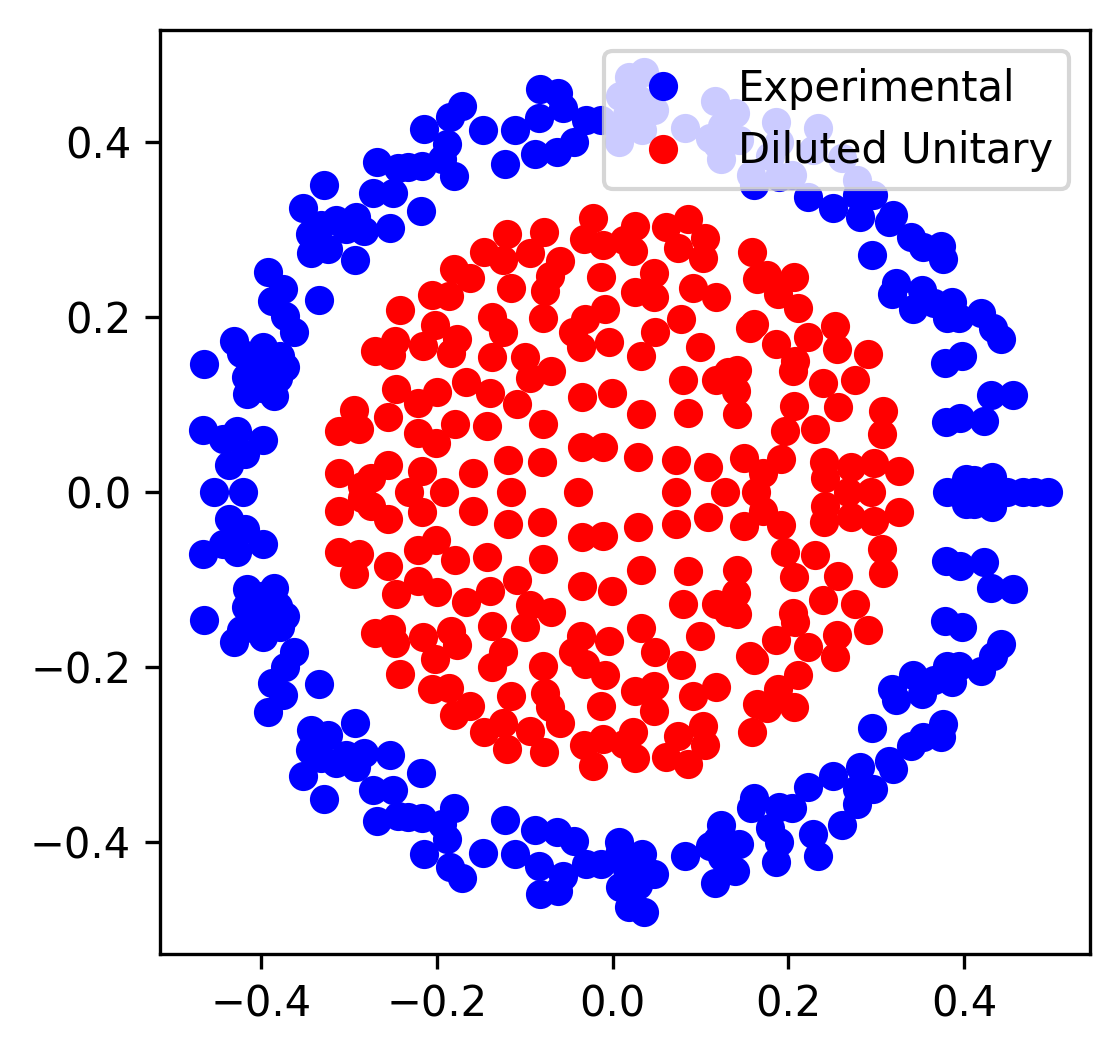

tf.Tensor(0.2150573509073522, shape=(), dtype=float64)


In [32]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [37]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
#U = generate_unitary(d)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 25,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))

In [38]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 100, 
            N = 500, 
            verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

0.2124773816774479 None
0.22043332625047227 None
0.22235413391869024 None
0.21184635534848634 None
0.22068017579343696 None
0.21473059593099797 None
0.21280104673929587 None
0.22124125117683996 None
0.21576020220244685 None
0.21420208463725768 None
0.22242879503355556 None


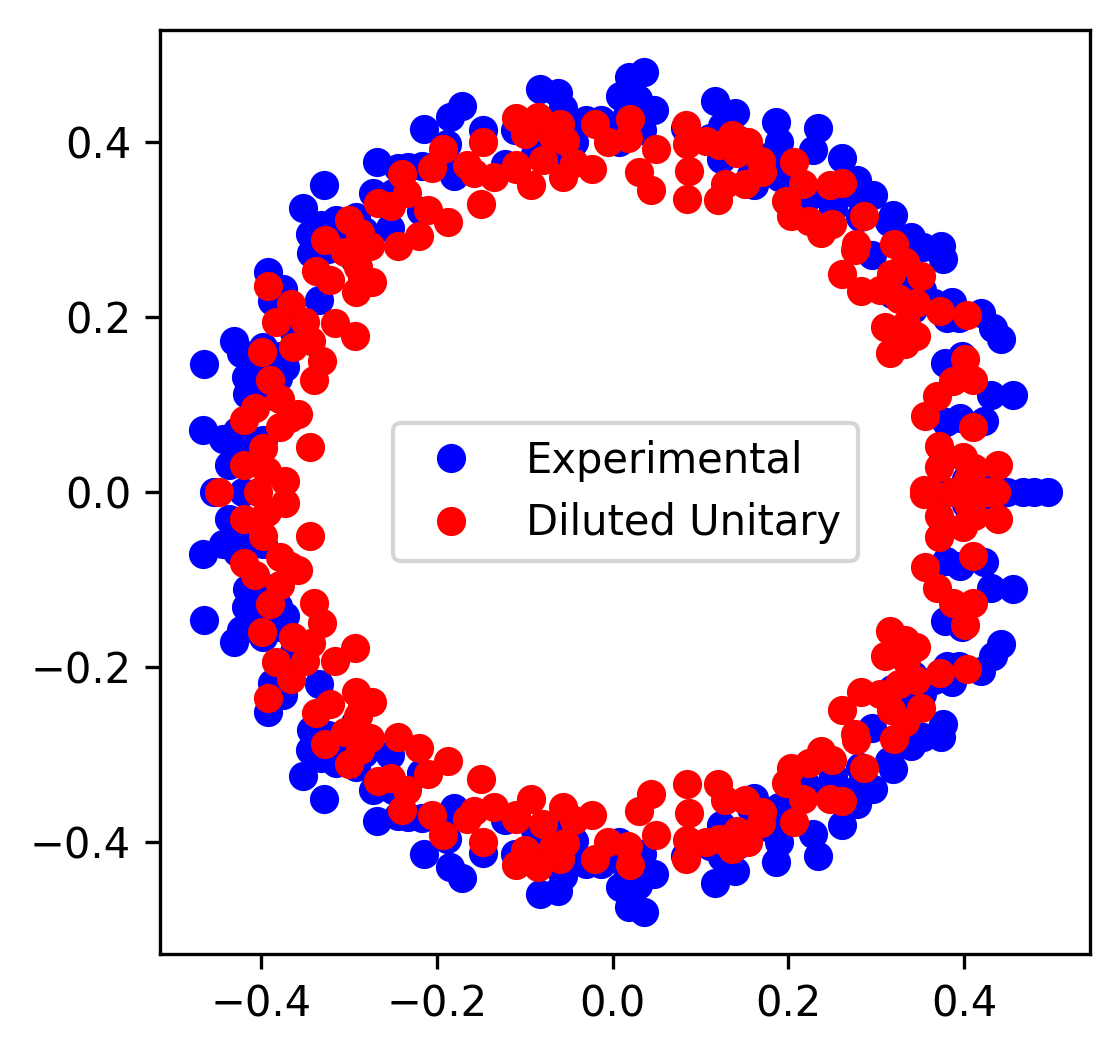

tf.Tensor(0.39791353374520716, shape=(), dtype=float64)


In [39]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [40]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 200, 
            N = 500, 
            verbose = True)

  0%|          | 0/200 [00:00<?, ?it/s]

0.2194131851310963 None
0.21404756453545787 None
0.22255958896385725 None
0.21154815023188006 None
0.21054900821752962 None
0.21592463086234673 None
0.21652166182512403 None
0.2164520208662445 None
0.2279619618410064 None
0.2159465898433842 None
0.21985491193273587 None
0.2184740272224517 None
0.21507364402118312 None
0.2106065734007656 None
0.21285456870368763 None
0.21392195847901121 None
0.22220465375817577 None
0.2130520671776944 None
0.22287685635645638 None
0.21821291365300038 None
0.2240098727876747 None


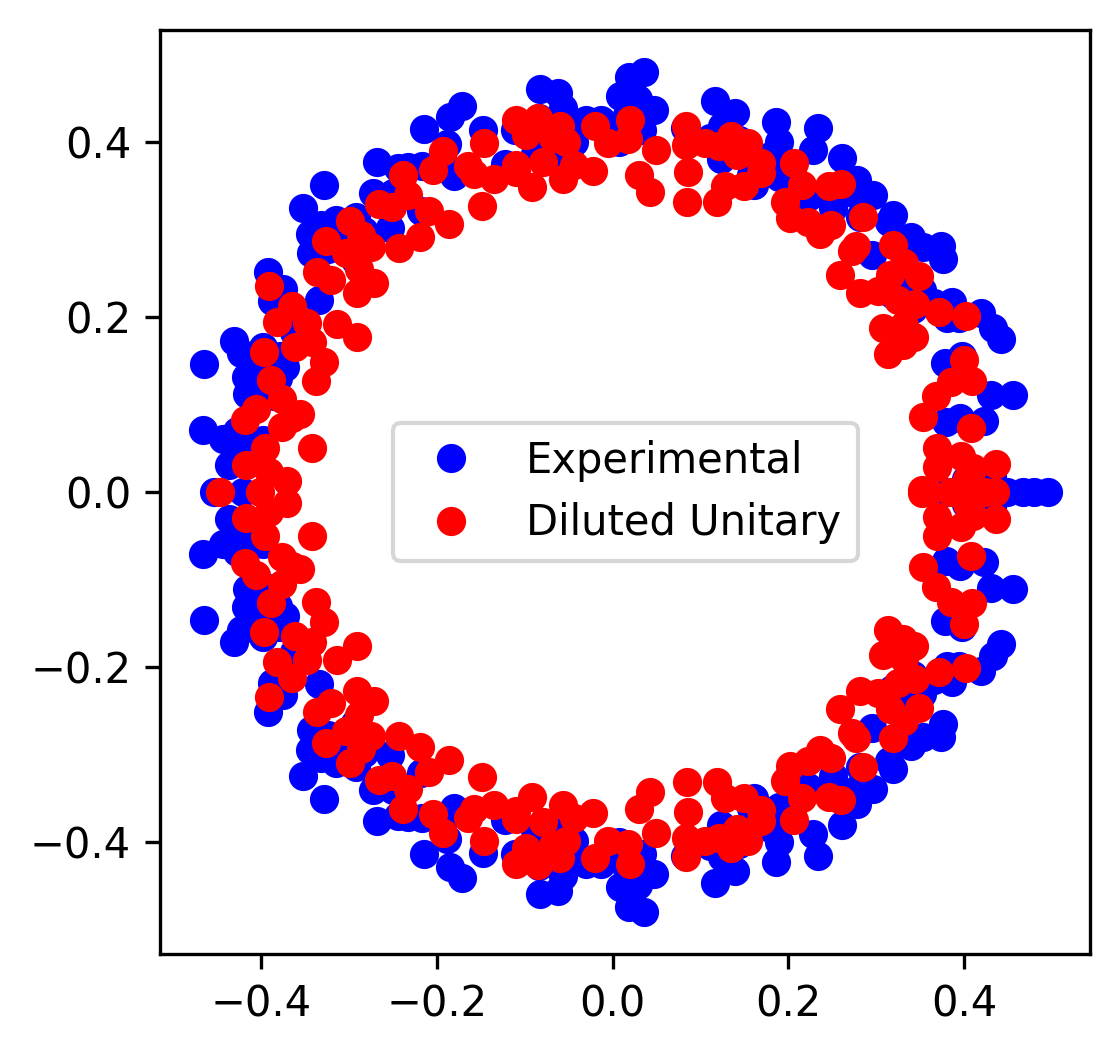

tf.Tensor(0.39590637919269556, shape=(), dtype=float64)


In [41]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [48]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
#U = generate_unitary(d)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.9,
                                                  rank = 8,
                                                  U = U,
                                                  samples = 10,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))

In [53]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 100, 
            N = 500, 
            verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

0.232237218616133 None
0.2333010793903126 None
0.23804634976158168 None
0.22778280642706777 None
0.23040038186478 None
0.22107955189024936 None
0.2225728023280023 None
0.22981151718102993 None
0.22869491102157186 None
0.22160312225868117 None
0.22583187012041464 None


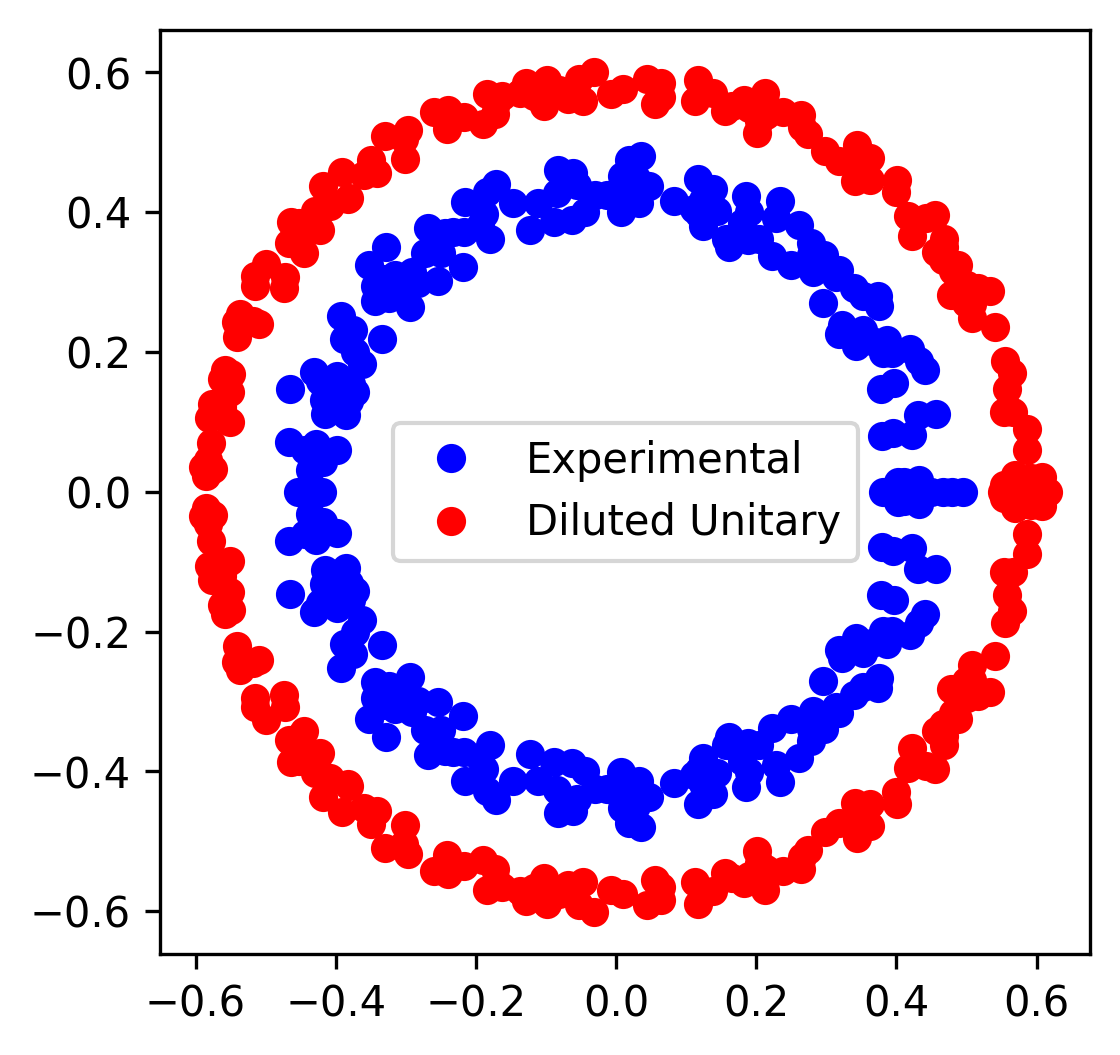

tf.Tensor(0.5824832884381518, shape=(), dtype=float64)


In [54]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [ ]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
#U = generate_unitary(d)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.5,
                                                  rank = 8,
                                                  U = U,
                                                  samples = 25,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))